Keeping only 22.553973% of the DCT coefficients


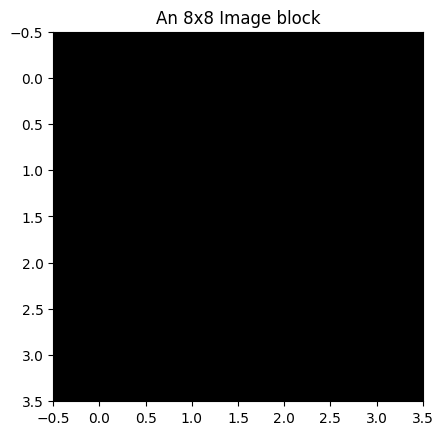

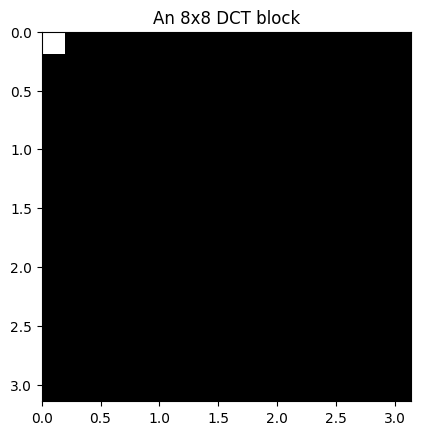

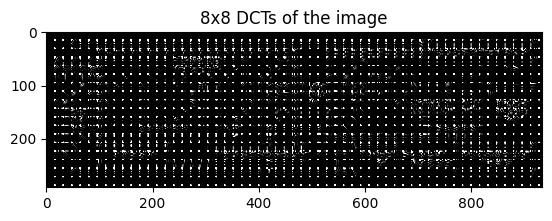

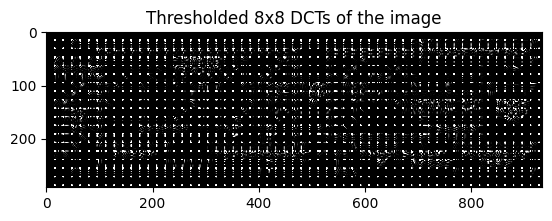

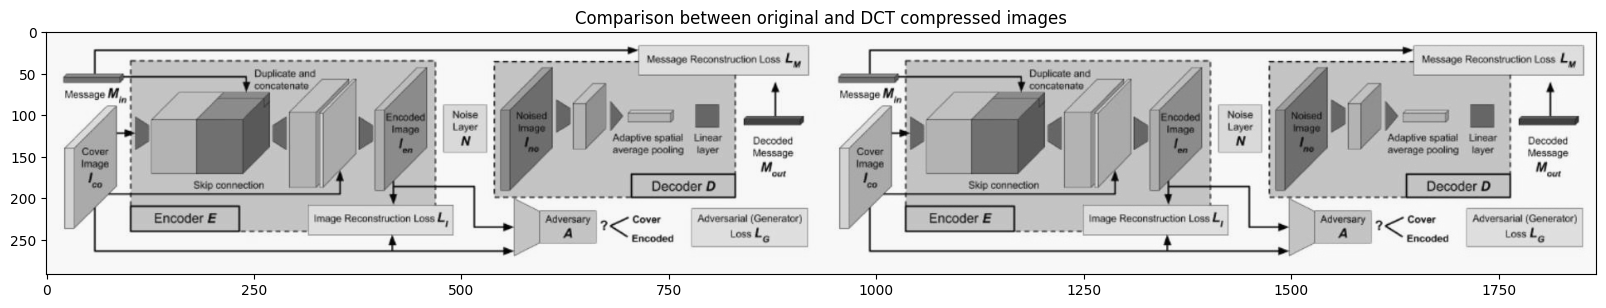

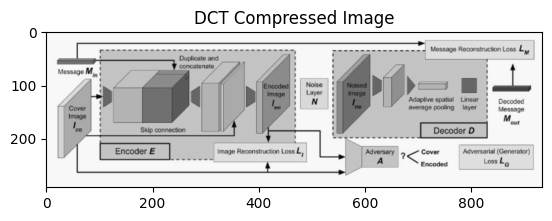

In [10]:
# 필요한 패키지를 import함
from __future__ import print_function
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = "image.jpg"

image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imsize = gray.shape
dct = np.zeros(imsize)

gray2 = np.float32(gray)
# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:8]:
    for j in np.r_[:imsize[1]:16]:
        dct[i:(i+16),j:(j+8)] = cv2.dct( gray2[i:(i+16),j:(j+16)] )

pos = 128

# Extract a block from image
plt.figure()
plt.imshow(gray[pos:pos+4,pos:pos+4],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+16,pos:pos+16],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

thresh = 0.001  # 1: 0.379 / 2: 0.17 / 3: 0.024 / 4: 0.001 / 5: 0.0003
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

im_dct = np.zeros(imsize)

for i in np.r_[:imsize[0]:16]:
    for j in np.r_[:imsize[1]:16]:
        im_dct[i:(i+16),j:(j+16)] = cv2.idct( dct_thresh[i:(i+16),j:(j+16)] )
        
        
plt.figure(figsize=(20,10))
plt.imshow(np.hstack((gray, im_dct)), cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

plt.show()

plt.figure()
plt.imshow(im_dct, cmap='gray')
plt.title("DCT Compressed Image")
plt.show()


Keeping only 22.525740% of the DCT coefficients


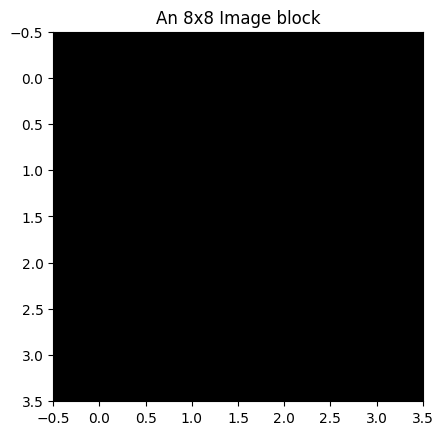

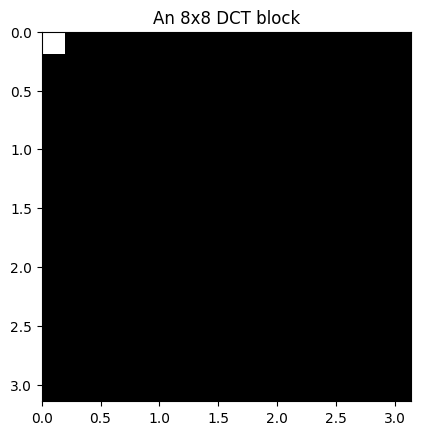

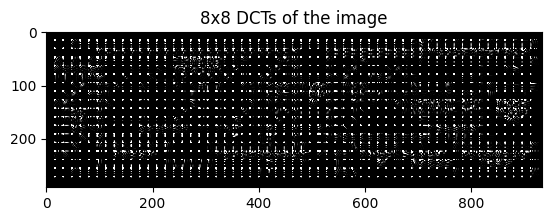

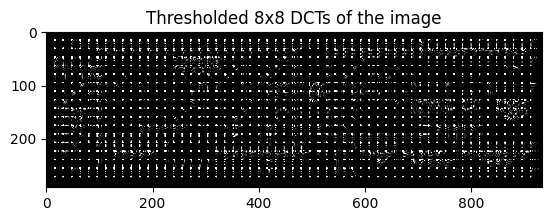

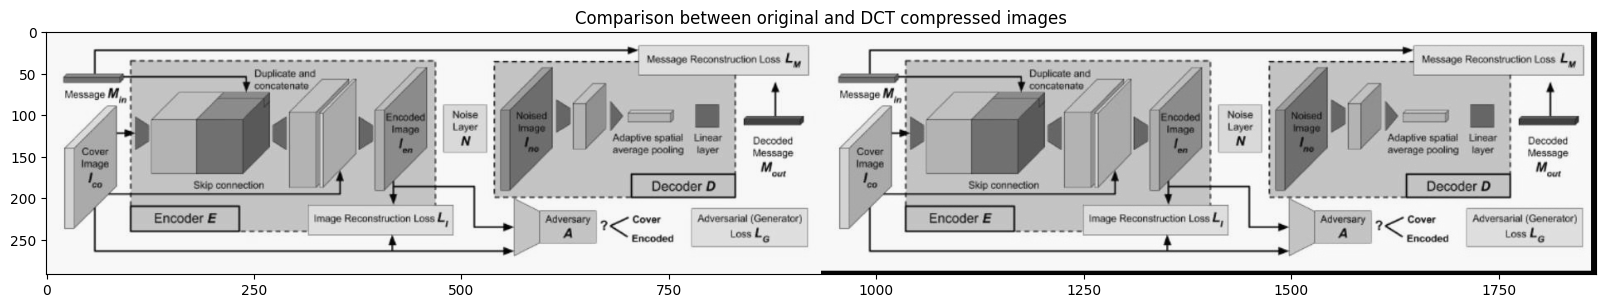

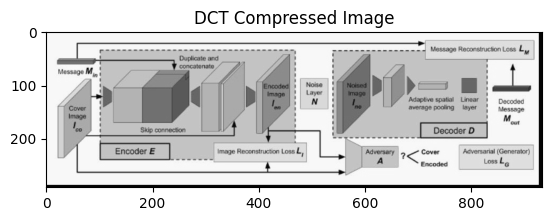

In [2]:
# 필요한 패키지를 import함
from __future__ import print_function
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

def dct_manual_16x16(block):
    M, N = 16, 16  # Assuming the block is 16x16
    # Create a 16x16 array to store the DCT coefficients
    dct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the DCT for each coefficient
    for u in range(M):
        for v in range(N):
            if u == 0:
                cu = np.sqrt(1/M)
            else:
                cu = np.sqrt(2/M)
            if v == 0:
                cv = np.sqrt(1/N)
            else:
                cv = np.sqrt(2/N)
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    sum_val += block[x, y] * \
                               np.cos((2*x + 1) * u * np.pi / (2*M)) * \
                               np.cos((2*y + 1) * v * np.pi / (2*N))
            dct_block[u, v] = cu * cv * sum_val
    return dct_block

def idct_manual_16x16(dct_block):
    M, N = 16, 16  # Assuming the block is 16x16
    # Create a 16x16 array to store the inverse DCT (IDCT) values
    idct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the IDCT for each pixel
    for x in range(M):
        for y in range(N):
            sum_val = 0
            for u in range(M):
                for v in range(N):
                    cu = 1 / np.sqrt(M) if u == 0 else np.sqrt(2 / M)
                    cv = 1 / np.sqrt(N) if v == 0 else np.sqrt(2 / N)
                    sum_val += cu * cv * dct_block[u, v] * \
                               np.cos((2 * x + 1) * u * np.pi / (2 * M)) * \
                               np.cos((2 * y + 1) * v * np.pi / (2 * N))
            idct_block[x, y] = sum_val
    return idct_block

filename = "image.jpg"

image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imsize = gray.shape
dct = np.zeros(imsize)

gray2 = np.float32(gray)
# Do 8x8 DCT on image (in-place)
for i in np.r_[:imsize[0]:16]:
    for j in np.r_[:imsize[1]:16]:
        block = gray2[i:(i+16),j:(j+16)]
        if block.shape == (16, 16):  # 블록 크기 확인
            dct[i:(i+16),j:(j+16)] = dct_manual_16x16(block) # 사용자 정의 함수 적용

pos = 128


# Extract a block from image
plt.figure()
plt.imshow(gray[pos:pos+4,pos:pos+4],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+16,pos:pos+16],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

thresh = 0.001  # 1: 0.379 / 2: 0.17 / 3: 0.024 / 4: 0.001 / 5: 0.0003
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

im_dct = np.zeros(imsize)

# Perform manual IDCT on 16x16 blocks of the thresholded DCT coefficients
for i in range(0, imsize[0], 16):
    for j in range(0, imsize[1], 16):
        block = dct_thresh[i:(i+16), j:(j+16)]
        if block.shape == (16, 16):
            im_dct[i:(i+16), j:(j+16)] = idct_manual_16x16(block)

plt.figure(figsize=(20,10))
plt.imshow(np.hstack((gray, im_dct)), cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

plt.show()

plt.figure()
plt.imshow(im_dct, cmap='gray')
plt.title("DCT Compressed Image")
plt.show()


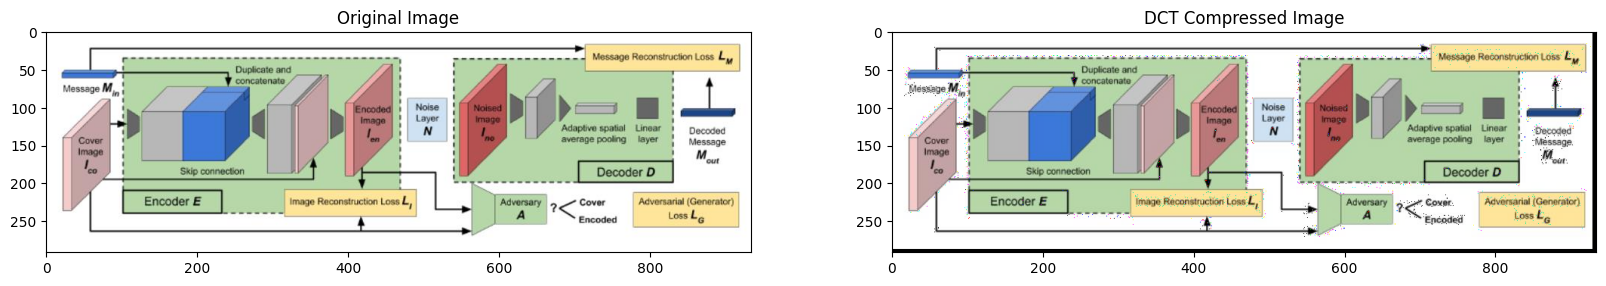

In [5]:
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

def dct_manual_8x8(block):
    M, N = 8, 8  # Assuming the block is 8x8
    # Create a 8x8 array to store the DCT coefficients
    dct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the DCT for each coefficient
    for u in range(M):
        for v in range(N):
            if u == 0:
                cu = np.sqrt(1/M)
            else:
                cu = np.sqrt(2/M)
            if v == 0:
                cv = np.sqrt(1/N)
            else:
                cv = np.sqrt(2/N)
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    sum_val += block[x, y] * \
                               np.cos((2*x + 1) * u * np.pi / (2*M)) * \
                               np.cos((2*y + 1) * v * np.pi / (2*N))
            dct_block[u, v] = cu * cv * sum_val
    return dct_block

def idct_manual_8x8(dct_block):
    M, N = 8, 8  # Assuming the block is 8x8
    # Create a 8x8 array to store the inverse DCT (IDCT) values
    idct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the IDCT for each pixel
    for x in range(M):
        for y in range(N):
            sum_val = 0
            for u in range(M):
                for v in range(N):
                    cu = 1 / np.sqrt(M) if u == 0 else np.sqrt(2 / M)
                    cv = 1 / np.sqrt(N) if v == 0 else np.sqrt(2 / N)
                    sum_val += cu * cv * dct_block[u, v] * \
                               np.cos((2 * x + 1) * u * np.pi / (2 * M)) * \
                               np.cos((2 * y + 1) * v * np.pi / (2 * N))
            idct_block[x, y] = sum_val
    return idct_block

filename = "image.jpg"

# 이미지를 컬러로 읽습니다.
image = cv2.imread(filename)

# 이미지의 크기를 가져옵니다.
imsize = image.shape

# 각 채널에 대해 DCT를 저장할 배열을 초기화합니다.
dct_channels = [np.zeros((imsize[0], imsize[1]), dtype=np.float32) for _ in range(3)]

# 이미지의 각 채널(B, G, R)에 대해 DCT를 수행합니다.
for idx, channel in enumerate(cv2.split(image)):
    gray2 = np.float32(channel) / 255.0  # 채널을 float32로 변환하고 정규화합니다.
    for i in np.r_[:imsize[0]:8]:
        for j in np.r_[:imsize[1]:8]:
            block = gray2[i:(i+8), j:(j+8)]
            if block.shape == (8, 8):  # 블록 크기 확인
                dct_channels[idx][i:(i+8), j:(j+8)] = dct_manual_8x8(block)

# 각 채널에 대해 IDCT를 수행할 배열을 초기화합니다.
idct_channels = [np.zeros((imsize[0], imsize[1]), dtype=np.float32) for _ in range(3)]

# 각 채널에 대해 임계값을 적용하고 IDCT를 수행합니다.
thresh = 0.001
for idx, dct_channel in enumerate(dct_channels):
    dct_thresh = dct_channel * (abs(dct_channel) > (thresh * np.max(dct_channel)))
    for i in range(0, imsize[0], 8):
        for j in range(0, imsize[1], 8):
            block = dct_thresh[i:(i+8), j:(j+8)]
            if block.shape == (8, 8):
                idct_channels[idx][i:(i+8), j:(j+8)] = idct_manual_8x8(block)

# DCT를 수행한 각 채널을 다시 하나의 이미지로 병합합니다.
im_dct_color = cv2.merge(idct_channels)

# 컬러 이미지와 DCT 후 복원된 이미지를 비교하기 위해 출력합니다.
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(np.uint8(im_dct_color * 255), cv2.COLOR_BGR2RGB))
plt.title("DCT Compressed Image")
plt.show()

In [ ]:
import argparse
import cv2
import numpy as np
from matplotlib import pyplot as plt

def dct_manual_16x16(block):
    M, N = 16, 16  # Assuming the block is 16x16
    # Create a 16x16 array to store the DCT coefficients
    dct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the DCT for each coefficient
    for u in range(M):
        for v in range(N):
            if u == 0:
                cu = np.sqrt(1/M)
            else:
                cu = np.sqrt(2/M)
            if v == 0:
                cv = np.sqrt(1/N)
            else:
                cv = np.sqrt(2/N)
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    sum_val += block[x, y] * \
                               np.cos((2*x + 1) * u * np.pi / (2*M)) * \
                               np.cos((2*y + 1) * v * np.pi / (2*N))
            dct_block[u, v] = cu * cv * sum_val
    return dct_block

def idct_manual_16x16(dct_block):
    M, N = 16, 16  # Assuming the block is 8x8
    # Create a 8x8 array to store the inverse DCT (IDCT) values
    idct_block = np.zeros((M, N), dtype=np.float32)
    # Compute the IDCT for each pixel
    for x in range(M):
        for y in range(N):
            sum_val = 0
            for u in range(M):
                for v in range(N):
                    cu = 1 / np.sqrt(M) if u == 0 else np.sqrt(2 / M)
                    cv = 1 / np.sqrt(N) if v == 0 else np.sqrt(2 / N)
                    sum_val += cu * cv * dct_block[u, v] * \
                               np.cos((2 * x + 1) * u * np.pi / (2 * M)) * \
                               np.cos((2 * y + 1) * v * np.pi / (2 * N))
            idct_block[x, y] = sum_val
    return idct_block

filename = "image.jpg"

# 이미지를 컬러로 읽습니다.
image = cv2.imread(filename)

# 이미지의 크기를 가져옵니다.
imsize = image.shape

# 각 채널에 대해 DCT를 저장할 배열을 초기화합니다.
dct_channels = [np.zeros((imsize[0], imsize[1]), dtype=np.float32) for _ in range(3)]

# 이미지의 각 채널(B, G, R)에 대해 DCT를 수행합니다.
for idx, channel in enumerate(cv2.split(image)):
    gray2 = np.float32(channel) / 255.0  # 채널을 float32로 변환하고 정규화합니다.
    for i in np.r_[:imsize[0]:16]:
        for j in np.r_[:imsize[1]:8]:
            block = gray2[i:(i+16), j:(j+8)]
            if block.shape == (8, 8):  # 블록 크기 확인
                dct_channels[idx][i:(i+8), j:(j+8)] = dct_manual_8x8(block)

# 각 채널에 대해 IDCT를 수행할 배열을 초기화합니다.
idct_channels = [np.zeros((imsize[0], imsize[1]), dtype=np.float32) for _ in range(3)]

# 각 채널에 대해 임계값을 적용하고 IDCT를 수행합니다.
thresh = 0.001
for idx, dct_channel in enumerate(dct_channels):
    dct_thresh = dct_channel * (abs(dct_channel) > (thresh * np.max(dct_channel)))
    for i in range(0, imsize[0], 8):
        for j in range(0, imsize[1], 8):
            block = dct_thresh[i:(i+8), j:(j+8)]
            if block.shape == (8, 8):
                idct_channels[idx][i:(i+8), j:(j+8)] = idct_manual_8x8(block)

# DCT를 수행한 각 채널을 다시 하나의 이미지로 병합합니다.
im_dct_color = cv2.merge(idct_channels)

# 컬러 이미지와 DCT 후 복원된 이미지를 비교하기 위해 출력합니다.
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(np.uint8(im_dct_color * 255), cv2.COLOR_BGR2RGB))
plt.title("DCT Compressed Image")
plt.show()

In [14]:
image.shape

(292, 934, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


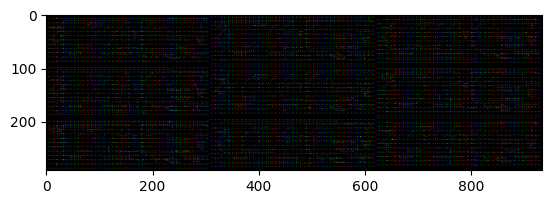

In [6]:
plt.imshow(np.array(dct_channels).reshape(292, 934, 3))

In [8]:
cv2.imwrite("./dct_result.png", dct)

True

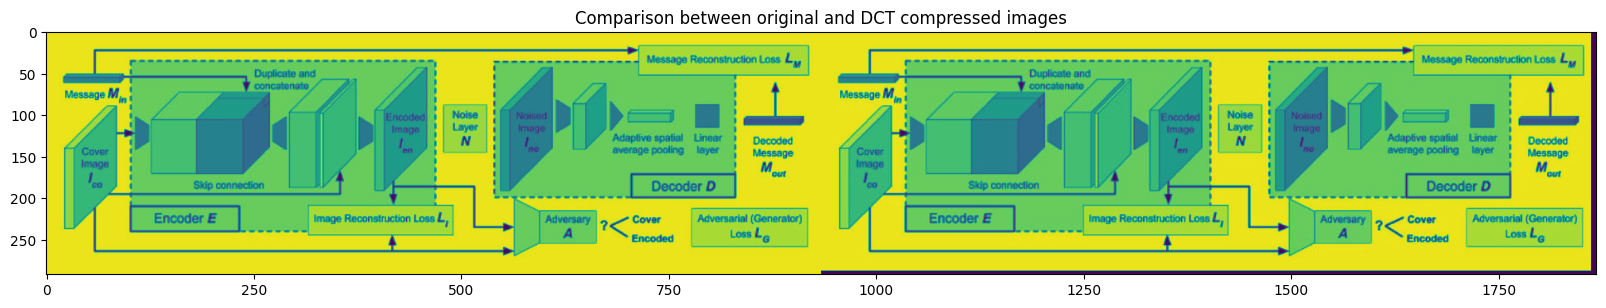

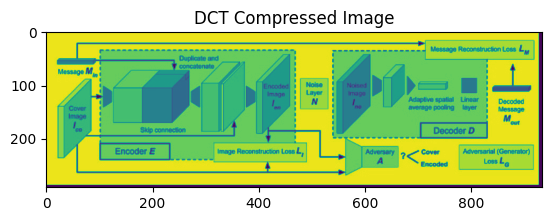

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(np.hstack((gray, im_dct)))
plt.title("Comparison between original and DCT compressed images" )

plt.show()

plt.figure()
plt.imshow(im_dct)
plt.title("DCT Compressed Image")
plt.show()